# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# Посмотрим на имеющийся датасет

data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [23]:
# посмотрим, какие значения есть уникальные
data.children.unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

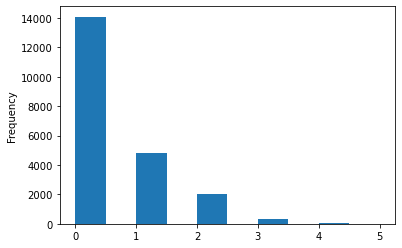

In [24]:
# посмотрим, какой вид распределения характерен для количества детей
data.children.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

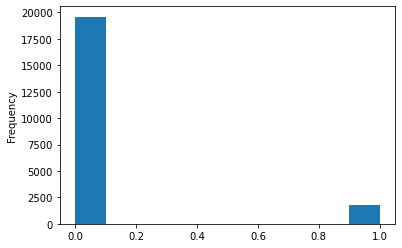

In [25]:
# посмотрим тоже самое, но уже с возвратом кредита в срок
data.debt.plot(kind="hist")

In [26]:
#теперь посмотрим и на саму корреляцию:
data['children'].corr(data['debt'])

0.024643415439591036

In [27]:
# давайте сделаем сводную таблицу, чтобы опираться в зависимости не на коэффициент Пирсона, 
# а на отношение кличества должников к количествую заемщиков по каждой из категорий

children_grouped = data.groupby(['children']).agg({'debt':['sum','count']})
children_grouped['percentage_overdue'] = children_grouped['debt']['sum'] / children_grouped['debt']['count']
children_grouped

debt        percentage_overdue
           sum  count                   
children                                
0         1063  14091           0.075438
1          444   4808           0.092346
2          194   2052           0.094542
3           27    330           0.081818
4            4     41           0.097561
5            0      9           0.000000

**Вывод:** 
Значение корреляции составляет 2,4%. Фактически она отсутствует. 
Но добавленная группировка показывает, что наиболее частые проблемы с платежами возникают у заемщиков, у которых 1 ребенок; чаще - 2 ребенка. Группа с наименьшим дефолтом платежа явялется - без детей. Группы с тремя и более детьми малочисленны (не являются репрезентативными). 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [28]:
# Ранее уже смотрели уникальные значения по столбцу "children". Теперь можно посмотреть и семейное положение.
ls_uni_family_status = data.family_status.unique()
ls_uni_family_status

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [29]:
# сделаем маленькую копию документа и выгрузим в отдельный df
data_shot_corr = data[['family_status', 'debt']].copy()
data_shot_corr.head(20)

,family_status,debt
0,женат / замужем,0
1,женат / замужем,0
2,женат / замужем,0
3,женат / замужем,0
4,гражданский брак,0
5,гражданский брак,0
6,женат / замужем,0
7,женат / замужем,0
8,гражданский брак,0
9,женат / замужем,0


In [30]:
# значение семейного положение является категориальным признаком. Поэтому здесь лучше воспользоваться предвариительной предобработкой OHE (onehotencoder)
one_hot = pd.get_dummies(data_shot_corr['family_status'])
one_hot

,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
21520,0,0,0,1,0
21521,0,0,0,0,1
21522,0,0,0,1,0
21523,0,0,0,0,1


In [31]:
data_shot_corr = data_shot_corr.join(one_hot)                           # добавим распредлеенный One Hot к анализруемому data_shot_corr  
data_shot_corr = data_shot_corr.drop('family_status', axis=1)           # удалим столбец family_status
data_shot_corr

,debt,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,1,0
...,...,...,...,...,...,...
21520,0,0,0,0,1,0
21521,0,0,0,0,0,1
21522,1,0,0,0,1,0
21523,1,0,0,0,0,1


In [32]:
# построим матрицу корреляций:

corr_matrix = data_shot_corr.corr()
corr_matrix

,debt,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
debt,1.000000,0.023382,-0.009383,-0.011824,0.021422,-0.023799
Не женат / не замужем,0.023382,1.000000,-0.094365,-0.083900,-0.190428,-0.451577
в разводе,-0.009383,-0.094365,1.000000,-0.052484,-0.119124,-0.282487
вдовец / вдова,-0.011824,-0.083900,-0.052484,1.000000,-0.105912,-0.251158
гражданский брак,0.021422,-0.190428,-0.119124,-0.105912,1.000000,-0.570057
женат / замужем,-0.023799,-0.451577,-0.282487,-0.251158,-0.570057,1.000000


In [33]:
# давайте сделаем сводную таблицу, чтобы опираться в зависимости не на коэффициент Пирсона, 
# а на отношение кличества должников к количествую заемщиков по каждой из категорий

family_status_grouped = data.groupby(['family_status']).agg({'debt':['sum','count']})
family_status_grouped['percentage_overdue'] = family_status_grouped['debt']['sum'] / family_status_grouped['debt']['count']
family_status_grouped

debt        percentage_overdue
                       sum  count                   
family_status                                       
Не женат / не замужем  273   2796           0.097639
в разводе               84   1189           0.070648
вдовец / вдова          63    951           0.066246
гражданский брак       385   4134           0.093130
женат / замужем        927  12261           0.075606

**Вывод:** 
Существенно значимой корреляции семейного положения и возвратом кредита в срок не выявлено.
Из всех имеющихся групп статусов наихудшей явялется "не женат / не замужем".
Также возможно отметить, что заемщики, которые ранее вступали в браки являеются более надежными.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

<AxesSubplot:ylabel='Frequency'>

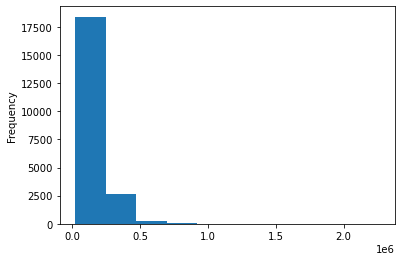

In [34]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

data.total_income.plot(kind="hist")

In [35]:
# посмотрим на максимальный и минимальный доходы:
print('Максимальный доход: ', max(data.total_income))
print('Минимальный доход: ', min(data.total_income))

Максимальный доход:  2265604
Минимальный доход:  20667


In [36]:
# Здесь идеально возможно использовать метод corr() без предварительной обработки. Попробуем воспользоваться им:
data['total_income'].corr(data['debt'])

-0.012671098818189926

In [37]:
# давайте сделаем сводную таблицу, чтобы опираться в зависимости не на коэффициент Пирсона, 
# а на отношение кличества должников к количествую заемщиков по каждой из категорий

total_income_category_grouped = data.groupby(['total_income_category']).agg({'debt':['sum','count']})
total_income_category_grouped['percentage_overdue'] = total_income_category_grouped['debt']['sum'] / total_income_category_grouped['debt']['count']
total_income_category_grouped

debt        percentage_overdue
                        sum  count                   
total_income_category                                
A                         2     25           0.080000
B                       354   5014           0.070602
C                      1353  15921           0.084982
D                        21    349           0.060172
E                         2     22           0.090909

**Вывод:**
Корреляция отрицательная, но тоже незначительная.
Самая низкая просрочка (чуть более 6%) приходится на категорию "D". Но она не является репрезентативной в силу низкого количества выданных кредитов. Также к нерепрезантативным группам относятся "А" и "Е".
Наихудший вариант в категории "C" (8,5%). Данная группа требует более глубокого изучения.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [38]:
# Для определения влияния посмотрим уникальные значения
ls_uni_purpose_category = data.purpose_category.unique()
ls_uni_purpose_category

array(['операции с недвижимостью', 'операции с автомобилем',
       'получение образования', 'проведение свадьбы'], dtype=object)

In [39]:
#... и добавим группировку по количеству и сумму значений.

purpose_grouped = data.groupby(['purpose_category']).agg({'debt':['sum','count']})
purpose_grouped

debt       
                          sum  count
purpose_category                    
операции с автомобилем    400   4279
операции с недвижимостью  780  10751
получение образования     369   3988
проведение свадьбы        183   2313

In [40]:
# посмотрим, какая доля является в данном случае самой недисциплинированной. Для этого разделим имеющийся просрочников (sum) на общее количество случаев (count) и запишем в поле "percentage_overdue"
purpose_grouped['percentage_overdue'] = purpose_grouped['debt']['sum'] / purpose_grouped['debt']['count']
purpose_grouped

debt        percentage_overdue
                          sum  count                   
purpose_category                                       
операции с автомобилем    400   4279           0.093480
операции с недвижимостью  780  10751           0.072551
получение образования     369   3988           0.092528
проведение свадьбы        183   2313           0.079118

**Вывод:** 
По таблице видно, что больше всего доля просрочки (9,34%) в категории "Операции с автомобилем", а менее всего в группе "Операции с недвижимостью" (7,25%)

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
При первичном анализе пропусков видно, что не заполнены столбцы: days_employed (общий трудовой стаж в днях) и total_income (ежемесячный доход). Количество пропусков в данных полях одинаковое. Поэтому можно сделать вывод о том, что данные случаи имеют массовых характер и продиктованы установленными процедурами. Например, анализ не на момент предоставления кредита (Collection Score и Мониторинг)
Очень маловероятен случай единичной ошибки.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
Заполнение медианным значением является грубым способом, но приемлемым. Лучшим является по определению. Рассчитывается, как значение по середине всего ряда. Если же брать, например, среднее (арифметическое, геометрической и др.), то эти значения могут сильно отклоняться в различных распределениях.

### Шаг 4: общий вывод.

Анализируемый дата-сет имеет достаточные данные для анализа. Имеющиеся пропуски по трудовому стажу и заработной плате относительно небольшие. Их возможно заменить медианным значениям, что и было произведено.
Предположительно ключевым фактом (целевым значением в функции) явялятся наличие задолженности по возврату кредитов (debt). Анализ корреляции показал незначительную корреляцию по показателями (количеством детей, семейным положением и уровнем дохода). Также группа "Операции с автомобилем" является наиболее недисциплинированной в плане платежеспособности